In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [2]:
def get_output_files():
    """
    This function returns a list of paths to the EIA files.

    Returns:
    --------
    path_list : list of strings
        The list of paths to output files.
    """

    path = "../eia_hourly_data/*.csv"

    path_list = glob.glob(path, recursive=True)
    
    return path_list

In [3]:
files = get_output_files()
files.sort()
files

['../eia_hourly_data/EIA930_BALANCE_2016_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2016_Jul_Dec.csv',
 '../eia_hourly_data/EIA930_BALANCE_2017_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2017_Jul_Dec.csv',
 '../eia_hourly_data/EIA930_BALANCE_2018_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2018_Jul_Dec.csv',
 '../eia_hourly_data/EIA930_BALANCE_2019_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2019_Jul_Dec.csv',
 '../eia_hourly_data/EIA930_BALANCE_2020_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2020_Jul_Dec.csv',
 '../eia_hourly_data/EIA930_BALANCE_2021_Jan_Jun.csv',
 '../eia_hourly_data/EIA930_BALANCE_2021_Jul_Dec.csv']

In [4]:
df = pd.read_csv(files[0], usecols=['Balancing Authority', 'Local Time at End of Hour', 'Demand (MW)'],
                 index_col='Local Time at End of Hour', parse_dates=True)
pjm_mask = df['Balancing Authority'] == 'PJM'
miso_mask = df['Balancing Authority'] == 'MISO'

pjm_df = df[pjm_mask].copy()
miso_df = df[miso_mask].copy()

pjm_df['Demand (MW)']=pjm_df['Demand (MW)'].str.replace(',','').astype('float')
miso_df['Demand (MW)']=miso_df['Demand (MW)'].str.replace(',','').astype('float')

In [5]:
for i, f in enumerate(files):
    if i == 0:
        continue
    else:
        df = pd.read_csv(f, usecols=['Balancing Authority', 'Local Time at End of Hour', 'Demand (MW)'],
                         index_col='Local Time at End of Hour', parse_dates=True)
        pjm_mask = df['Balancing Authority'] == 'PJM'
        miso_mask = df['Balancing Authority'] == 'MISO'

        pjm_df_inter = df[pjm_mask].copy()
        miso_df_inter = df[miso_mask].copy()

        pjm_df_inter['Demand (MW)']=pjm_df_inter['Demand (MW)'].str.replace(',','').astype('float')
        miso_df_inter['Demand (MW)']=miso_df_inter['Demand (MW)'].str.replace(',','').astype('float')
        
        frames1 = [pjm_df, pjm_df_inter]
        pjm_df = pd.concat(frames1, axis=0)
        frames2 = [miso_df, miso_df_inter]
        miso_df = pd.concat(frames2, axis=0)

<AxesSubplot:xlabel='Local Time at End of Hour'>

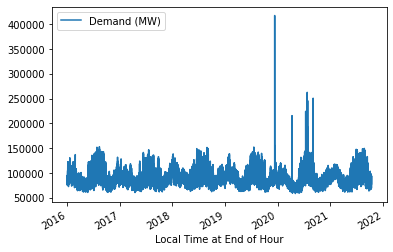

In [6]:
pjm_df.plot()

<AxesSubplot:xlabel='Local Time at End of Hour'>

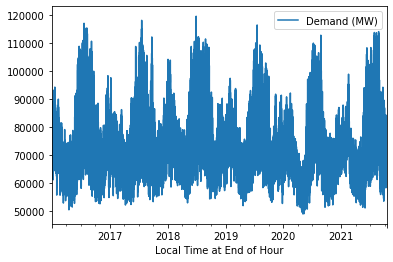

In [7]:
miso_df.plot()

In [8]:
miso_df[miso_df['Balancing Authority']=='PJM']

,Balancing Authority,Demand (MW)
Local Time at End of Hour,,


In [9]:
pjm_df[pjm_df['Balancing Authority']=='MISO']

,Balancing Authority,Demand (MW)
Local Time at End of Hour,,


In [10]:
miso_df.dropna(axis=0,inplace=True)

In [11]:
pjm_df.dropna(axis=0, inplace=True)

In [12]:
miso_df.drop(columns='Balancing Authority', inplace=True)

In [13]:
miso_df.to_csv('../miso_hourly_demand.csv')

In [14]:
pjm_df.drop(columns='Balancing Authority', inplace=True)

In [15]:
pjm_df.to_csv('../pjm_hourly_demand.csv')